# Fitting Linear and Non-Linear Models to solve the German credit risk scoring classification problem

#### Let's import the support libraries developed manually for this project and load the original dataset

In [18]:
%matplotlib inline
from classifiers import *
from dim_red import *

Loading German Credit scoring dataset transformed to use comma-separated values and printing numpy array dimensions

In [19]:

[X,y] = load_dataset('new-german-data.numeric',delim=',')
print X.shape
print y.shape

(999, 24)
(999,)


#### In order to take a first glance of the distribution of data, the first two principal components are calculated from the original data using PCA and plotted in 2D. It can be observed how there are certain spaces where data points of an specific class appear together, however there is no clear separation devisable through PCA analysis.

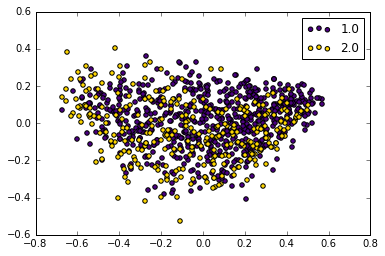

In [5]:
plotPCA(X,y)

#### In order to understand the relevance of the features of the dataset wrapper methods will be use to see the influence of the features on the final output. First the dataset will be splitted two obtain a training and test set, and then a simple SVM Linear classifier will be built in order to have a first glance on the influence of each attribute.

In [6]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
clf = svm.SVC(kernel='linear', C=10, probability=True)

In [7]:
def feature_analysis_prec(X,y,clf):
    scores = []
    names = range(0,X.shape[1])
    for i in range(X.shape[1]):
         score = cross_val_score(clf, X[:, i:i+1], y, scoring="precision",
                                  cv=ShuffleSplit(len(X), 3, .3))
         scores.append((round(np.mean(score), 3), names[i]))
    sorted_scores = sorted(scores, reverse=True)
    print sorted_scores
    return sorted_scores[0:4]
    
ss = feature_analysis_prec(X,y,clf)


[(0.723, 7), (0.721, 21), (0.721, 2), (0.72, 1), (0.719, 14), (0.717, 18), (0.714, 13), (0.714, 5), (0.713, 22), (0.708, 23), (0.702, 19), (0.701, 12), (0.7, 0), (0.698, 4), (0.697, 9), (0.694, 8), (0.693, 11), (0.693, 10), (0.693, 3), (0.691, 16), (0.69, 20), (0.687, 15), (0.682, 6), (0.676, 17)]


It can be seen that most of the features has a level of relevance regarding the precision of the classifier; which works as an indication of the false positive rate, critical for credit scoring. To take an additional glance to the ability of the features to represent the outcome let's take the first 4 higher relevant features and calculate and plot PCA on them. 

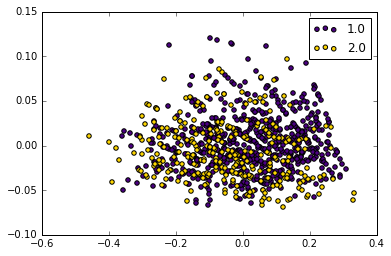

In [8]:
X_r = X[:,[ss[0][1],ss[1][1],ss[2][1],ss[3][1]]]
plotPCA(X_r,y)

As expected, no much better representational ability is obtained from the principal components on the first 4 most relevant features since each of the features is adding a certain degree of value on predicting the final outcome.

#### Given the complexity of the feature space more sophisticated models must be built in order to represent more accurately the nature of the data. In the following sections three different models are built using a Linear SVM, RBF Kernel SVM and Random Decision Forests. The latest two are expected to give better prediction rates (in terms of f1 measure, a ratio of precision and recall) at the expense of higher risk of overfitting. In order to avoid this a grid search is performed on each method to obtain the better model in terms of test set fitting accuracy, and cross validation is performed on each parameter combination to obtain a more representative mean accuracy in each case.

### Linear SVM

Let's split the dataset into 70% training set and 30% test set. Then less obtain the best model through cross validated grid search

In [9]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

param_grid = [
  {'C': [0.01,0.1, 1, 10, 100,1000], 'kernel': ['linear']}
 ]

clf = svm.SVC(kernel='linear', C=10)
clf = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
clf.fit(X_train, y_train)

print("Best parameters combination")
print(clf.best_params_)
print("F1 scores on each combination:")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() * 2, params))
print("Detailed classification report:")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Best parameters combination
{'kernel': 'linear', 'C': 100}
F1 scores on each combination:
0.816 (+/-0.002) for {'kernel': 'linear', 'C': 0.01}
0.816 (+/-0.002) for {'kernel': 'linear', 'C': 0.1}
0.816 (+/-0.002) for {'kernel': 'linear', 'C': 1}
0.816 (+/-0.002) for {'kernel': 'linear', 'C': 10}
0.826 (+/-0.021) for {'kernel': 'linear', 'C': 100}
0.823 (+/-0.029) for {'kernel': 'linear', 'C': 1000}
Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.84      0.91      0.87       217
        2.0       0.70      0.53      0.60        83

avg / total       0.80      0.81      0.80       300



Plotting the confusion matrix on the results we obtain the following:

[[198  19]
 [ 39  44]]


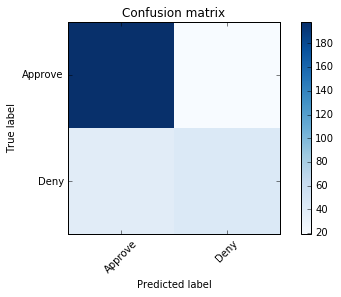

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plotConfusionMatrix(cm,['Approve','Deny'])

print cm
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]

We also observe an impressive speedup here.

In [ ]:
d = [abs(x[i] - y[j]) 
     for i in range(1000) for j in range(1000)]

In [ ]:
d[:3]

10. Now, we use a NumPy implementation, bringing out two slightly more advanced notions. First, we consider a **two-dimensional array** (or matrix). This is how we deal with *two* indices *i* and *j*. Second, we use **broadcasting** to perform an operation between a 2D array and a 1D array. We will give more details in *How it works...*

In [ ]:
da